In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
def preprocess_data(datapath: str, selected_features: list[str]) -> pd.DataFrame:
    """Read in and filter data
    Parameters
    ----------
    datapath:
        path to the csv file where columns are
        the attributes, rows are the observations
    selected_features:
        list of strings of features to keep
        should match some column names of the data
    Return
    ------
    data_subset:
        pandas table containing only the selected columns
    """
    data_in = pd.read_csv(datapath)
    data_subset = data_in[selected_features]
    return data_subset

In [3]:
def prepare_data(data_in: pd.DataFrame, y_ID: str, test_size: float) -> tuple:
    """Prepare data for training
    Parameters
    ----------
    data_in:
        pandas table containing attributes as columns,
        observations as rows
    y_ID:
        name of the column used as outcome
    test_size:
        fraction of samples to be used as validation data
    Return
    ------
    X_train:
        pandas.DataFrame of the predicting attributes as columns,
        observations as rows
        training subset
    X_test:
        pandas.DataFrame of the predicting attributes as columns,
        observations as rows
        testing subset
    y_train:
        pandas.DataFrame of the outcome attribute as column,
        observations as rows
        training subset
    y_test:
        pandas.DataFrame of the outcome attribute as column,
        observations as rows
        testing subset
    """
    y = data_in[y_ID]
    X = data_in.drop(y_ID, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=42)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_evaluation_result(confusion_matrix:np.ndarray) -> None:
    """Plot confusion matrix
    Parameters
    ----------
    confusion_matrix:
        2D array of a confusion matrix of 2 classes (Positive, Negative) 
    """
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_percentages = ["{0:.2%}".format(value) for value in
                        confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [5]:
def train_eval_model(model, X_train: np.ndarray, y_train: np.ndarray) -> None:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_train)
    cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)
    plot_evaluation_result(cf_matrix)

In [6]:
datapath = "/home/katalitf/Documents/conferences/NBD_22_workshop/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
features_of_interest = [
    "Diabetes_binary",
    "BMI",
    "Age",
    "Education"]
data_in = preprocess_data(datapath, features_of_interest)
X_train, X_test, y_train, y_test = prepare_data(data_in, "Diabetes_binary", 0.2)

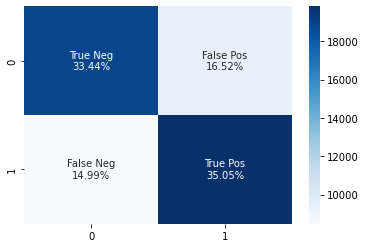

In [7]:
logit_model = LogisticRegression(penalty="l2", random_state=42)
train_eval_model(logit_model, X_train, y_train)

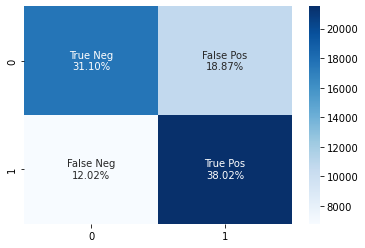

In [8]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=5,
    random_state=42)
train_eval_model(rf_model, X_train, y_train)

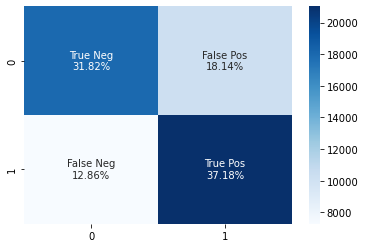

In [9]:
svm_model = SVC(
    kernel = "rbf",
    degree = 3,
    gamma = "scale",
    random_state=42)
train_eval_model(svm_model, X_train, y_train)